# Speech-to-Text Benchmark Analysis

This is where we analyze the data we collected from our benchmark.

In [1]:
import pandas as pd

raw_results = pd.read_csv("raw_results.csv")
raw_results

raw_to_pretty = {
    "google": "Google Translate",
    "picovoice": "Picovoice Leopard",
    "aws": "Amazon Web Services",
    "azure": "Microsoft Azure",
    "assemblyai": "AssemblyAI",
    "whisper": "Local Whisper",
    "openai_whisper": "Hosted Whisper",
    "sphinx": "CMU Sphinx",
    "deepgram": "Deepgram",
    "wit": "Wit.ai",
    "houndify": "Houndify",
    "voicegain": "Voicegain",
    "google_cloud": "Google Cloud Platform",
    "vosk": "Alpha Cephei Vosk"
}


raw_results.replace({"API": raw_to_pretty}, inplace=True)
raw_results

,Text,API,Time,WER,MER,WIL
0,Comiendo moscas,CMU Sphinx,1.312200,2.5,1.000000,1.000000
1,Comiendo moscas,Google Translate,1.545825,0.0,0.000000,0.000000
2,Comiendo moscas,Local Whisper,3.847062,0.5,0.333333,0.333333
3,Comiendo moscas,Wit.ai,1.793572,0.0,0.000000,0.000000
4,Comiendo moscas,Google Cloud Platform,2.122660,0.0,0.000000,0.000000
...,...,...,...,...,...,...
891,¿Y tú?,Hosted Whisper,1.857116,0.5,0.500000,0.750000
892,¿Y tú?,Alpha Cephei Vosk,0.130638,0.0,0.000000,0.000000
893,¿Y tú?,AssemblyAI,9.737954,0.5,0.500000,0.750000
894,¿Y tú?,Amazon Web Services,16.225238,0.5,0.500000,0.750000


# Charts for Blog Post

## Correlation Matrix
This shows that the different accuracy metrics aggregated by API are highly correlated, so we can just use WER in our analysis since it is the most widely used. It also shows that there's a negative correlation between the accuracy metrics and time taken, which indicates that, unfortunately, there's unlikely to be a single API that is both very fast and very accurate.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(rc={'figure.facecolor':'#cae8ff'})


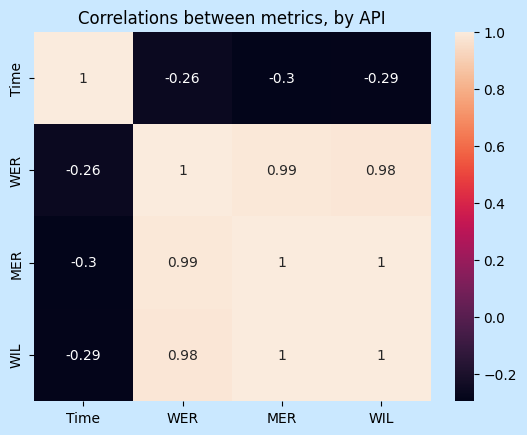

In [3]:
aggregated_means = raw_results.groupby("API").mean(numeric_only=True)

# correlation matrix visualized with seaborn
corr = aggregated_means.corr(numeric_only=True)
corr_heatmap = sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot = True).set(title='Correlations between metrics, by API')

# Boxplot of All Accuracies (WER)
We see a large skew here, with some options having near-zero WERs (extremely high accuracy), while others perform somewhat well, and some (namely Sphinx and Picovoice) perform extremely poorly.

In [4]:
sns.set_style(rc={'figure.facecolor':'#1c1d1f', 'axes.facecolor': '#cae8ff'})

title_fontdict = {'size': 20, 'color': '#cae8ff'}
axis_fontdict = {'size': 15, 'color': '#5cbbf9'}

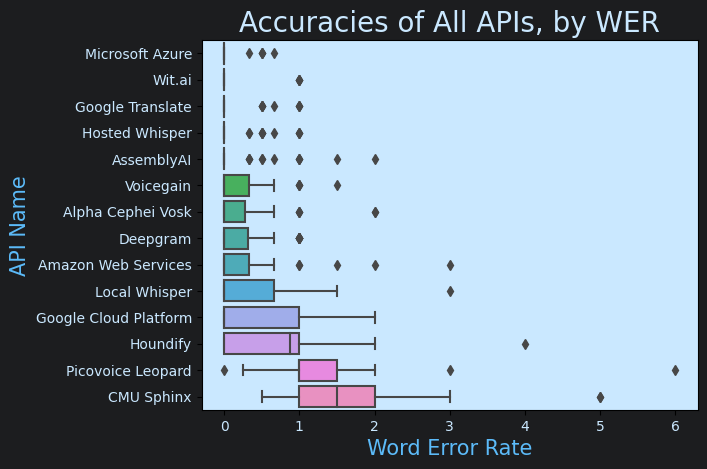

In [5]:
# Sort APIs by mean wer
sorted_accuracies = raw_results.groupby(by=["API"])["WER"].mean().sort_values()

# The box plot
all_accuracies = sns.boxplot(data = raw_results, x = "WER", y = "API", order = sorted_accuracies.index)
all_accuracies.set_title(label='Accuracies of All APIs, by WER', fontdict = title_fontdict)
all_accuracies.set_xlabel(xlabel='Word Error Rate', fontdict = axis_fontdict)
all_accuracies.set_ylabel(ylabel='API Name', fontdict = axis_fontdict)

for tick_label in all_accuracies.axes.get_yticklabels():
    tick_label.set_color("#cae8ff")

for tick_label in all_accuracies.axes.get_xticklabels():
    tick_label.set_color("#cae8ff")

# Show the plot
all_accuracies.get_figure();

# Boxplot of Better Accuracies (WER)
By removing the worst performers, we're able to better compare the better performers. We see that there are 5 options where the model made 0 errors in at least 75% of samples. Pretty impressive!

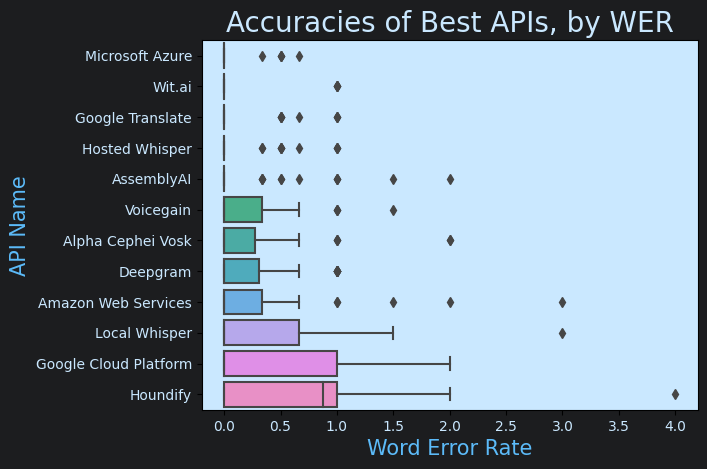

In [6]:
bad_apis = ["Picovoice Leopard", "CMU Sphinx"]
good_results = raw_results[~raw_results['API'].isin(bad_apis)]

# Sort APIs by median wer
sorted_good = good_results.groupby(by=["API"])["WER"].mean().sort_values()

# The box plot
good_accuracies = sns.boxplot(data = good_results, x = "WER", y = "API", order = sorted_good.index)
good_accuracies.set_title(label='Accuracies of Best APIs, by WER', fontdict = title_fontdict)
good_accuracies.set_xlabel(xlabel='Word Error Rate', fontdict = axis_fontdict)
good_accuracies.set_ylabel(ylabel='API Name', fontdict = axis_fontdict)

for tick_label in good_accuracies.axes.get_yticklabels():
    tick_label.set_color("#cae8ff")

for tick_label in good_accuracies.axes.get_xticklabels():
    tick_label.set_color("#cae8ff")

# Show the plot
good_accuracies.get_figure();

## Boxplot of All Latencies

We can explore the latencies of all of the different options. It looks like AssemblyAI and AWS are major outliers, distorting the chart and making it difficult to analyze the other options.

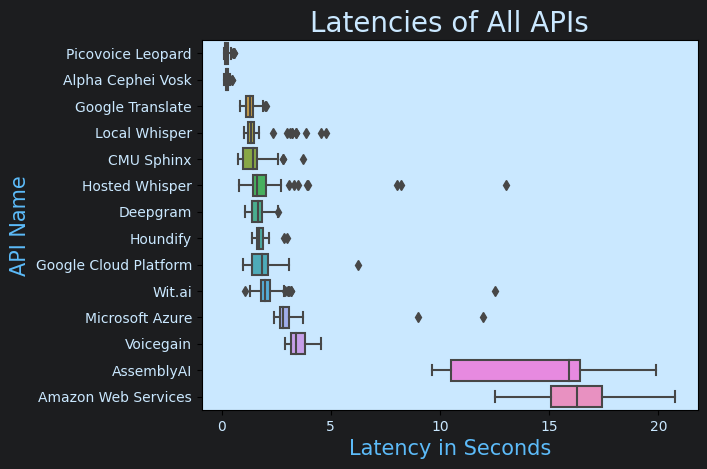

In [7]:
# Sort APIs by median time
sorted_latencies = raw_results.groupby(by=["API"])["Time"].median().sort_values()

# The box plot
all_latencies = sns.boxplot(data = raw_results, x = "Time", y = "API", order = sorted_latencies.index)
all_latencies.set_title(label='Latencies of All APIs', fontdict = title_fontdict)
all_latencies.set_xlabel(xlabel='Latency in Seconds', fontdict = axis_fontdict)
all_latencies.set_ylabel(ylabel='API Name', fontdict = axis_fontdict)

for tick_label in all_latencies.axes.get_yticklabels():
    tick_label.set_color("#cae8ff")

for tick_label in all_latencies.axes.get_xticklabels():
    tick_label.set_color("#cae8ff")

# Show the plot
all_latencies.get_figure();

## Boxplot of Fast Latencies
Here we can better compare the latencies of the options, since they're not as bunched together, once we removed AWS and AssemblyAI. We can see that Vosk and Picovoice are by far the fastest options, while Voicegain and Azure are the slowest of the fast options.

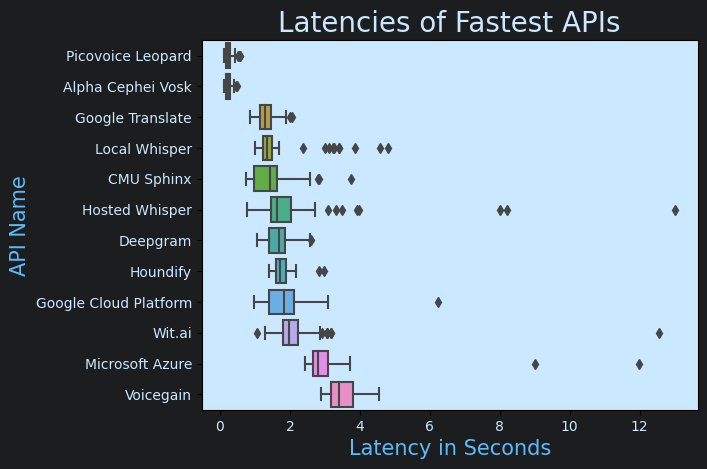

In [8]:
slow_apis = ["AssemblyAI", "Amazon Web Services"]
fast_results = raw_results[~raw_results['API'].isin(slow_apis)]

# Sort APIs by median time
sorted_fast = fast_results.groupby(by=["API"])["Time"].median().sort_values()

# The box plot
fast_latencies = sns.boxplot(data = fast_results, x = "Time", y = "API", order = sorted_fast.index)
fast_latencies.set_title(label='Latencies of Fastest APIs', fontdict = title_fontdict)
fast_latencies.set_xlabel(xlabel='Latency in Seconds', fontdict = axis_fontdict)
fast_latencies.set_ylabel(ylabel='API Name', fontdict = axis_fontdict)

for tick_label in fast_latencies.axes.get_yticklabels():
    tick_label.set_color("#cae8ff")

for tick_label in fast_latencies.axes.get_xticklabels():
    tick_label.set_color("#cae8ff")

# Show the plot
fast_latencies.get_figure();

## Boxplot of Latencies of Highest Accuracy APIs
In the accuracy plots, we were able to identify 5 APIs (Microsoft Azure, Wit.ai, Google Translate, OpenAI’s Whisper, and AssemblyAI) with median WERs of 0. In this graphic, we'll take those top 5 by accuracy and plot their latencies.

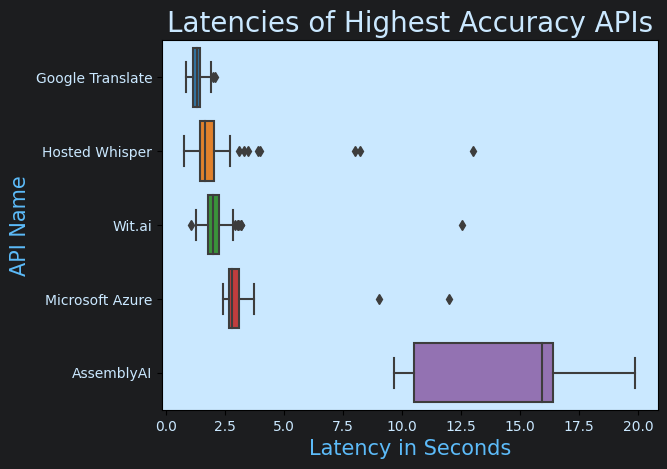

In [9]:
best_apis = ["Microsoft Azure", "Wit.ai", "Google Translate", "Hosted Whisper", "AssemblyAI"]
best_results = raw_results[raw_results['API'].isin(best_apis)]

# Sort APIs by median time
sorted_best = best_results.groupby(by=["API"])["Time"].median().sort_values()

# The box plot
fast_latencies = sns.boxplot(data = best_results, x = "Time", y = "API", order = sorted_best.index)
fast_latencies.set_title(label='Latencies of Highest Accuracy APIs', fontdict = title_fontdict)
fast_latencies.set_xlabel(xlabel='Latency in Seconds', fontdict = axis_fontdict)
fast_latencies.set_ylabel(ylabel='API Name', fontdict = axis_fontdict)

for tick_label in fast_latencies.axes.get_yticklabels():
    tick_label.set_color("#cae8ff")

for tick_label in fast_latencies.axes.get_xticklabels():
    tick_label.set_color("#cae8ff")

# Show the plot
fast_latencies.get_figure();

# Analysis for Table

This is where we collect the numbers that we will use for our table.

In [10]:
#filter raw_results to only include the APIs we want to compare

df_for_table = raw_results[raw_results['API'].isin(["Local Whisper", "Hosted Whisper", "Google Cloud Platform", "Amazon Web Services", "Picovoice Leopard", "AssemblyAI", "Deepgram"])]
df_for_table

,Text,API,Time,WER,MER,WIL
2,Comiendo moscas,Local Whisper,3.847062,0.5,0.333333,0.333333
4,Comiendo moscas,Google Cloud Platform,2.122660,0.0,0.000000,0.000000
8,Comiendo moscas,Picovoice Leopard,0.213290,2.0,1.000000,1.000000
9,Comiendo moscas,Hosted Whisper,1.640377,0.0,0.000000,0.000000
11,Comiendo moscas,AssemblyAI,16.006326,0.0,0.000000,0.000000
...,...,...,...,...,...,...
890,¿Y tú?,Picovoice Leopard,0.146254,1.0,1.000000,1.000000
891,¿Y tú?,Hosted Whisper,1.857116,0.5,0.500000,0.750000
893,¿Y tú?,AssemblyAI,9.737954,0.5,0.500000,0.750000
894,¿Y tú?,Amazon Web Services,16.225238,0.5,0.500000,0.750000


## Accuracy

We will compare the mean WERs of the different APIs. We will scale them to be between 0 and 10, with 0 being bad (low accuracy, high WER) and 10 being good (high accuracy, low WER).

Although we collect three different accuracy measures, we use WER since it all three measures are highly correlated (as indicated in the correlation matrix) and WER is the most familiar for most readers.

In [11]:
from sklearn import preprocessing

sorted_wer = df_for_table.groupby(['API']).mean(numeric_only = True)["WER"].sort_values().reset_index()
sorted_wer["inverse_wer"] = 1/sorted_wer["WER"]

scaler = preprocessing.MinMaxScaler(feature_range=(0, 10))
sorted_wer["scaled_wer"] = scaler.fit_transform(sorted_wer[["inverse_wer"]])
sorted_wer

,API,WER,inverse_wer,scaled_wer
0,Hosted Whisper,0.098958,10.105263,10.000000
1,AssemblyAI,0.143229,6.981818,6.644076
2,Deepgram,0.212240,4.711656,4.204946
3,Amazon Web Services,0.251563,3.975155,3.413626
4,Local Whisper,0.381771,2.619372,1.956932
5,Google Cloud Platform,0.441406,2.265487,1.576707
6,Picovoice Leopard,1.253125,0.798005,0.000000


## Speed

We will compare the mean latencies of the different APIs. We will scale them to be between 0 and 10, with 0 being bad (low speed, high latency) and 10 being good (high speed, low latency).

In [12]:
sorted_time = df_for_table.groupby(['API']).mean(numeric_only = True)["Time"].sort_values().reset_index()
sorted_time["inverse_time"] = 1/sorted_time["Time"]

sorted_time["scaled_time"] = scaler.fit_transform(sorted_time[["inverse_time"]])
sorted_time

,API,Time,inverse_time,scaled_time
0,Picovoice Leopard,0.252299,3.963545,10.000000
1,Local Whisper,1.660155,0.602353,1.386382
2,Deepgram,1.681040,0.594870,1.367204
3,Google Cloud Platform,1.867991,0.535335,1.214635
4,Hosted Whisper,2.156983,0.463611,1.030830
5,AssemblyAI,14.231896,0.070265,0.022816
6,Amazon Web Services,16.296838,0.061362,0.000000


### Speed with normal distribution

Since scaling results in such a skewed distribution, we will log data in addition to scaling, to make it easier to interpret. Understates the magnitude of difference between the fastest option (Picovoice) and the second fastest (local Whisper), but this is preferable to having skewed data be uninterpretable

In [13]:
import numpy as np

sorted_time["log_time"] = np.log(sorted_time["inverse_time"])
sorted_time["scaled_logtime"] = scaler.fit_transform(sorted_time[["log_time"]])
sorted_time

,API,Time,inverse_time,scaled_time,log_time,scaled_logtime
0,Picovoice Leopard,0.252299,3.963545,10.000000,1.377139,10.000000
1,Local Whisper,1.660155,0.602353,1.386382,-0.506911,5.479846
2,Deepgram,1.681040,0.594870,1.367204,-0.519413,5.449852
3,Google Cloud Platform,1.867991,0.535335,1.214635,-0.624863,5.196859
4,Hosted Whisper,2.156983,0.463611,1.030830,-0.768710,4.851745
5,AssemblyAI,14.231896,0.070265,0.022816,-2.655486,0.325052
6,Amazon Web Services,16.296838,0.061362,0.000000,-2.790971,0.000000
